In [1]:
from pathlib import Path

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("default")

In [2]:
# Paths
FILE_DIR = Path().absolute()
ROOT_DIR = FILE_DIR.parent
RES_DIR = ROOT_DIR / "results" / "dropout"

# Architectures
partition = ["mingjian"]
nnodes = [64, 128, 196]
archs = [
    f"{part}_partition_{n1}_{n2}_{n3}"
    for part in partition
    for n1 in nnodes
    for n2 in nnodes
    for n3 in nnodes
]

# Total number of parameters
ninput = 51
noutput = 1

nparams = []
for n1 in nnodes:
    for n2 in nnodes:
        for n3 in nnodes:
            nparams = np.append(nparams, (ninput*n1)+n1 + (n1*n2)+n2 + (n2*n3)+n3 + (n3*noutput)+noutput)

# Lattice parameters
ainit = 3.56
alist = np.linspace(0.93, 1.09, 21) * ainit

In [3]:
idx_sort = np.argsort(nparams)
cmap = mpl.colormaps["inferno"]
colors = cmap(np.linspace(0, 1, len(nparams)))

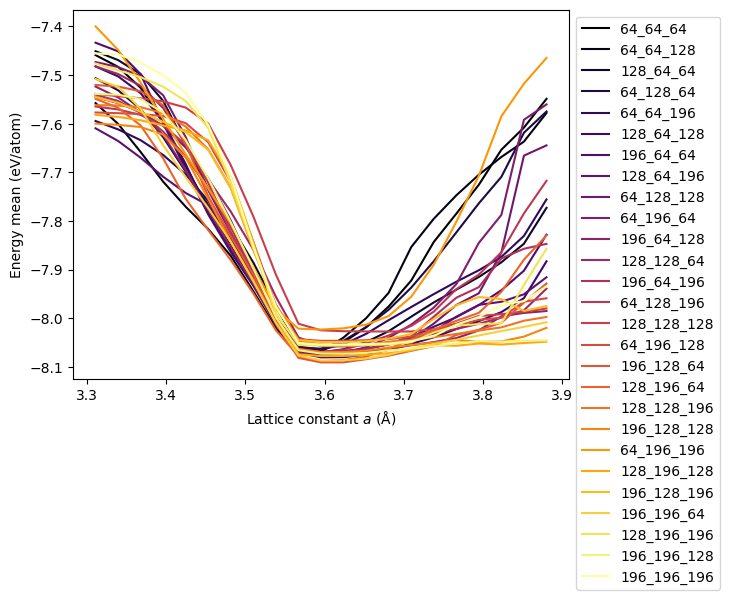

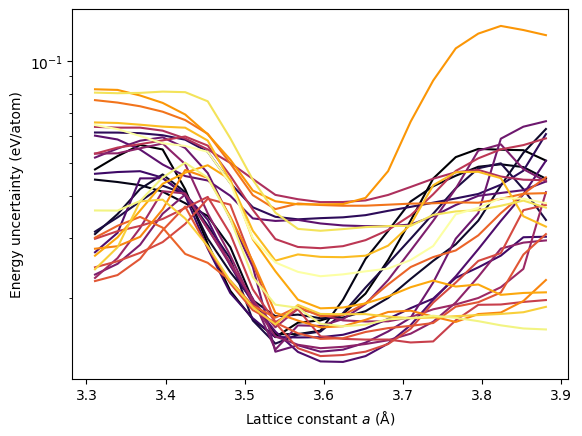

In [4]:
_, ax1 = plt.subplots()  # For energy mean
_, ax2 = plt.subplots()  # For energy uncertainty
for ii, idx in enumerate(idx_sort):
    arch = archs[idx]
    CASE_DIR = RES_DIR / arch
    preds_data = np.load(CASE_DIR / "uncertainty_energy_vs_latconst_diamond.npz")
    energy_ensembles = preds_data["energy_ensembles"]
    energy_mean = np.mean(energy_ensembles, axis=0)
    energy_uncert = np.std(energy_ensembles, axis=0)

    ax1.plot(alist, energy_mean, label=arch[19:], c=colors[ii])
    ax2.plot(alist, energy_uncert, label=arch[19:], c=colors[ii])

ax1.set_xlabel(r"Lattice constant $a$ $(\mathrm{\AA})$")
ax1.set_ylabel("Energy mean (eV/atom)")
ax1.legend(bbox_to_anchor=(1, 1))

ax2.set_yscale("log")
ax2.set_xlabel(r"Lattice constant $a$ $(\mathrm{\AA})$")
ax2.set_ylabel("Energy uncertainty (eV/atom)")
plt.show()